<a href="https://colab.research.google.com/github/MingSheng92/CNN/blob/master/Sequential_MNIST_CNN_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sequential Convolutional Neural Network (CNN)

Below is the example to load and run CNN on MNIST dataset.

The notebook is tested on <a href="https://colab.research.google.com/">Google colab</a>.

First we will load the source/package from github to our session with the use of <b>!git clone</b>


In [1]:
!git clone https://github.com/MingSheng92/CNN.git

Cloning into 'CNN'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 110 (delta 3), reused 0 (delta 0), pack-reused 98
Receiving objects: 100% (110/110), 31.71 KiB | 364.00 KiB/s, done.
Resolving deltas: 100% (45/45), done.


## Import scripts 

Once the package is loaded, we will proceed to load the scripts that we will be using for image classification.

First we will load the scripts with jupyter magic function <b>%load</b>, and we will be able to use the code as usual as shown below.

In [0]:
%load /content/CNN/scripts/ConvNeuralNetwork.py
%load /content/CNN/scripts/Functional_CNN.py
%load /content/CNN/scripts/Sequential_CNN.py
%load /content/CNN/scripts/preprocess.py
%load /content/CNN/scripts/PCA.py
%load /content/CNN/scripts/utility.py

from CNN.scripts.preprocess import load_data, normalize, one_hot
from CNN.scripts.Sequential_CNN import CNN
from CNN.scripts.PCA import PCA
from CNN.scripts.utility import plot_predictions

import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
%matplotlib inline

## Dataset 

In this notebook, we will use MNIST dataset for our experiment. 

The MNIST dataset is a collection of handwritten digits that contains 60,000 examples in training set and 10,000 test set examples. 

For more information about the dataset, you can refer to <a href="https://http://yann.lecun.com/exdb/mnist/">MNIST dataset site</a>.

In the cell below, we perform the following:
1. **load data:** <br />
We load the dataset directly from <a href="https://keras.io/datasets/">Keras</a>.

2. **pre-process step 1: Normalize feature** <br />
$ z = \frac{x - min(x)}{max(x)- min(x)} $ <br/>
, where $x$ will be each and every pixel in our case, and $z$ would be our rescaled data that is ranging between $ 0 \le z \le 1 $.
3. **pre-process step 2: one-hot encoding for label data.**
In order to train our CNN, we will make use of one hot encoding.
Eg. In our case, our label is ranging between 0-9 for each and every digit, hence if the label for one of the sample is 5 then the encoding for this label would be.
```
[0 0 0 0 0 1 0 0 0 0]
```





In [4]:
dataset='mnist'
# load data set 
x_train, y_train, x_test, y_test = load_data(dataset, reshape=True)

# normalize the data set
x_train = normalize(x_train)
x_test = normalize(x_test)

# perform one hot encoding for the dataset
y_train = one_hot(y_train)
y_test = one_hot(y_test)

11493376/11490434 [==============================] - 1s 0us/step


In [14]:
# once the dataset is loaded and preprocessing step is done, we will check on the dataset
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


## Neural Network

Now that we have loaded the dataset and performed some pre-processing steps we are ready to create CNN and start training it. 

In [0]:
batch_size = 512
num_classes = 10
epochs = 10

NN = CNN(batch_size, epochs, num_classes)

In [7]:
layer = [32, 100]
NN.createCNN(num_classes, layer)

Note : No TPU detected : The model will run on local machine with cpu...
Upload to Colab and change runtime type to TPU if you want faster training time.
















In [8]:
# get summary
NN.CNN_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               540900    
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

Once we have done created the CNN we are ready to initiate training process on the CNN. In here we are performing cross fold validation, with the fold set to 5.

**Note :** <br/>
To make full use of Google Colab, make sure to enable GPU/TPU for your session to have faster training time.

In case you do not know how to enable hardware in google colab, you can find the option in: <br/>
**Edit -> Notebook settings -> Hardware Accelerator**

In [9]:
acc_list = NN.trainByBatch(NN.batch_size, x_train, y_train, 5)


Training on Fold:  1
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 18s 339us/step - loss: 0.2301 - acc: 0.8509 - val_loss: 0.2282 - val_acc: 0.9323
Epoch 2/10
54000/54000 [==============================] - 15s 270us/step - loss: 0.2281 - acc: 0.9358 - val_loss: 0.2277 - val_acc: 0.9485
Epoch 3/10
54000/54000 [==============================] - 14s 267us/step - loss: 0.2277 - acc: 0.9507 - val_loss: 0.2275 - val_acc: 0.9590
Epoch 4/10
54000/54000 [==============================] - 14s 264us/step - loss: 0.2275 - acc: 0.9583 - val_loss: 0.2274 - val_acc: 0.9620
Epoch 5/10
54000/54000 [==============================] - 14s 268us/step - loss: 0.2274 - acc: 0.9645 - val_loss: 0.2273 - val_acc: 0.9650
Epoch 6/10
54000/54000 [==============================] - 14s 266us/step - loss: 0.2273 - acc: 0.9682 - val_loss: 0.2272 - val_acc: 0.9683

## Evaluation

With a relative simple CNN set up, we managed to achieve 98% accuracy rate with the testing data. 

In [12]:
score = NN.CNN_model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 86us/step
Test loss: 0.2268160147666931
Test accuracy: 0.9839


Now we can plot out some of the testing datas and see how well our CNN classifies the unseen data.

<Figure size 288x216 with 0 Axes>

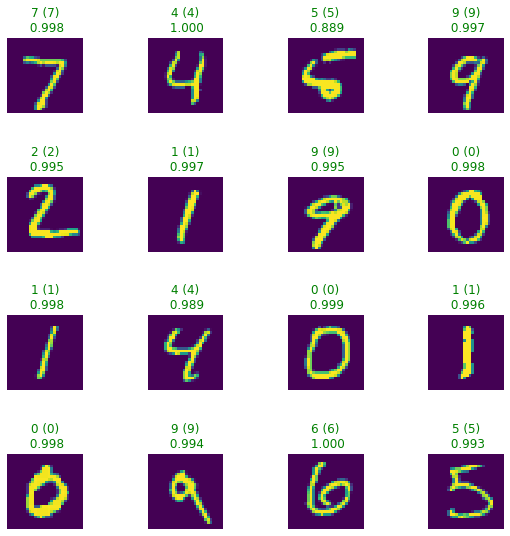

In [13]:
plot_predictions(np.squeeze(x_test[:16]), NN.CNN_model.predict(x_test[:16]), y_test[:16].argmax(axis=1), dataset)